In [431]:
import numpy as np
import ipdb
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import linregress
from copy import deepcopy
import matplotlib.ticker as ticker
import pickle
import matplotlib.pyplot as plt

## Load data

In [40]:
#reload object from file


file2 = open(r'/home/ahaimovici/Documents/Teaching/Rectangle_Game/C3/Data/Individual/Teachers.pkl', 'rb')
Teachers = pickle.load(file2)
file2.close()

file2 = open(r'/home/ahaimovici/Documents/Teaching/Rectangle_Game/C3/Data/Individual/Learners.pkl', 'rb')
Learners = pickle.load(file2)
file2.close()


In [41]:
for 

73

## Check consistency in learners and remove bad trials and bad learners

In [51]:
file2 = open(r'/home/ahaimovici/Documents/Teaching/Rectangle_Game/C3/Data/Individual/Teachers.pkl', 'rb')
Teachers = pickle.load(file2)
file2.close()

file2 = open(r'/home/ahaimovici/Documents/Teaching/Rectangle_Game/C3/Data/Individual/Learners.pkl', 'rb')
Learners = pickle.load(file2)
file2.close()


New_Learners=[];

for subject in Learners:
    n_trial=-1;
    s1=deepcopy(subject);
    New_Learners.append(s1);
    New_Learners[len(New_Learners)-1]['trials']=[];
    inconsistent_trials=0
    for trial in subject['trials']:        
        n_trial=n_trial+1;
        box=trial['Box'];
        consistent=True;
        for circle in trial['Circles']:
            if not(circle[0]>=box[0] and circle[0]<=box[1] and circle[1]>=box[2] and circle[1]<=box[3]):
                consistent=False;
        for cross in trial['Crosses']:
            if cross[0]>=box[0] and cross[0]<=box[1] and cross[1]>=box[2] and cross[1]<=box[3]:
                consistent=False;
        if consistent and trial['Consistent']:
            New_Learners[len(New_Learners)-1]['trials'].append(trial);        
        else:
            inconsistent_trials+=1            
    s1['inconsistent_trials']=inconsistent_trials/len(subject['trials'])

Learners=New_Learners;

New_Learners=[];
for s in Learners:    
    if s['inconsistent_trials']<0.1:
        New_Learners.append(s)        
Learners=New_Learners;            
            
    
    

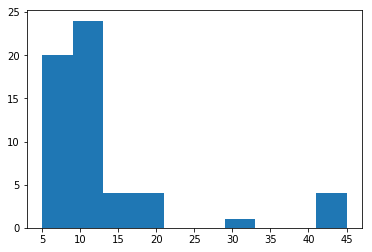

In [54]:
# Ages

ages=[]
for l in Learners:
    ages.append(l['age'])

plt.hist(ages)
plt.show()




In [100]:
for s in Teachers:
    ncir=0
    ncross=0
    for trial in s['trials']:
        ncir+=len(trial['Circles'])
        ncross+=len(trial['Crosses'])
    print(s['age'],ncir,ncross)
    
    

9 60 40
6 63 37
11 50 50
7 67 33
7 65 35
10 0 100
12 19 81
18 4 96
5 1 3
32 48 52
41 99 1
8 71 29
10 43 57
49 32 68
11 48 52
6 33 67
20 86 14
6 57 43
5 88 12
9 49 51
11 55 45
9 53 47
14 66 34
8 62 38
6 29 31
7 55 45
7 48 52
7 51 49
18 18 82
5 57 43
10 40 60
5 0 100
11 32 68
42 79 21
40 47 53
10 13 87
16 0 100
6 63 37
12 50 50
5 51 49
57 90 0
9 29 23
40 25 75
9 66 34
44 22 28
13 55 45
7 91 9
9 48 52
7 59 41
10 54 46
6 18 22
10 49 51
8 84 16
12 2 4
13 27 73
9 4 6
9 88 12
10 7 93
9 33 67
13 57 43
7 54 46
10 17 13


In [313]:


def individual_histogram(subject,**kwargs): # as in the paper
        
    normalize=False
    if kwargs is not None:                
        if 'normalize' in kwargs.keys():            
            normalize=kwargs['normalize']
        
    
    
    n_bins=3;
    canvas_size=974;
    inner_bins=np.zeros([n_bins,n_bins]); 
    outer_bins=np.zeros([n_bins+1,n_bins+1]);             
    n_trial=-1;
    for trial in subject['trials']:
            n_trial=n_trial+1;
            box=trial['Box'];
            width=box[1]-box[0];
            height=box[3]-box[2];            
            for circle in trial['Circles']:
                x=circle[0]-box[0];
                y=circle[1]-box[2];
                x_bin=np.int(np.floor(x/(width/n_bins)));
                y_bin=np.int(np.floor(y/(height/n_bins)));
                if(x_bin==3):
                    x_bin=2;
                if(y_bin==3):
                    y_bin=2;                
                
                if normalize:
                    inner_bins[x_bin,y_bin ]=inner_bins[x_bin,y_bin]+1/(width*height/n_bins**2); # NORMALIZE PER UNIT AREA
                else:
                    inner_bins[x_bin,y_bin ]=inner_bins[x_bin,y_bin]+1;    
                    
            for cross in trial['Crosses']:
                if (cross[0]-box[0])<0: #left side
                    x=box[0]-cross[0];
                    x_bin=np.int(np.floor(x/(box[0]/n_bins)))+1; # bins 1,2 or 3                    
                    norm_x=box[0]/n_bins
                elif cross[0]>box[1]: #right side
                    x=cross[0]-box[1];
                    x_bin=np.int(np.floor(x/((canvas_size-box[1])/n_bins)))+1;
                    norm_x=(canvas_size-box[1])/n_bins
                else: # above or below the box
                    x_bin=0;                
                    norm_x=(box[1]-box[0])/n_bins
                    
                if (cross[1]-box[2])<0: # above
                    y=box[2]-cross[1];
                    y_bin=np.int(np.floor(y/(box[2]/n_bins)))+1;
                    norm_y=box[2]/n_bins
                elif cross[1]>box[3]:
                    y=cross[1]-box[3];
                    y_bin=np.int(np.floor(y/((canvas_size-box[3])/n_bins)))+1;
                    norm_y=(canvas_size-box[3])/n_bins
                else:
                    y_bin=0;
                    norm_y=(box[3]-box[2])/n_bins
                if x_bin>3 or y_bin>3:
                    print('Something went wrong: x_bin or y_bin >0')
                    ipdb.set_trace()
                                    
                
                if normalize:
                    outer_bins[x_bin,y_bin]=outer_bins[x_bin,y_bin]+1/(norm_x*norm_y); # NORMALIZE PER UNIT AREA
                else:
                    outer_bins[x_bin,y_bin]=outer_bins[x_bin,y_bin]+1;            
                    
    return inner_bins, outer_bins;


def distance_to_box(subject):
    # returns a list with the distance to the nearest side of the box
    sample_dist=[];
    for trial in subject['trials']:    
        box=trial['Box'];
        corner_1=[box[0],box[2]];
        corner_2=[box[0],box[3]];
        corner_3=[box[1],box[2]];
        corner_4=[box[1],box[3]];    
        for sample in trial['Circles']:                       
            dist=min(sample[0]-box[0],box[1]-sample[0],sample[1]-box[2],box[3]-sample[1]);                        
            sample_dist.append(dist);
        for sample in trial['Crosses']:
            if (sample[0]>=box[0])and(sample[0]<=box[1]): # top or bottom
                dist=min(abs(sample[1]-box[2]),abs(sample[1]-box[3]));
            elif(sample[1]>=box[2])and(sample[1]<=box[3]): # right or left
                dist=min(abs(sample[0]-box[0]),abs(sample[0]-box[1]));
            else:                    
                dist=min(euclidean_dist(sample,corner_1),euclidean_dist(sample,corner_2),euclidean_dist(sample,corner_3),euclidean_dist(sample,corner_4));                
            sample_dist.append(dist);             
    return sample_dist;
    

def distance_to_corner(subject):
    # returns a list with the distance to the nearest corner of every sample
    sample_dist=[];
    for trial in subject['trials']:    
        box=trial['Box'];
        corner_1=[box[0],box[2]];
        corner_2=[box[0],box[3]];
        corner_3=[box[1],box[2]];
        corner_4=[box[1],box[3]];    
        for sample in trial['Circles']:
            dist=np.inf;        
            dist=min(dist,euclidean_dist(sample,corner_1));
            dist=min(dist,euclidean_dist(sample,corner_2));
            dist=min(dist,euclidean_dist(sample,corner_3));
            dist=min(dist,euclidean_dist(sample,corner_4));
            sample_dist.append(dist);
        for sample in trial['Crosses']:
            dist=np.inf;        
            dist=min(dist,euclidean_dist(sample,corner_1));
            dist=min(dist,euclidean_dist(sample,corner_2));
            dist=min(dist,euclidean_dist(sample,corner_3));
            dist=min(dist,euclidean_dist(sample,corner_4));
            sample_dist.append(dist);                
    return sample_dist;
        
def euclidean_dist(X,Y):
    return np.sqrt((X[0]-Y[0])**2+(X[1]-Y[1])**2);
       
        
def flat_list(some_list):
    # turns a list of lists into a single flat list
    elements=[]
    for item in some_list:
        if type(item) == type([]):
            elements += flat_list(item)
        else:
            elements.append(item)
    return elements
        
def draw_trial(trial):
    box=trial['Box'];
    fig=plt.figure;
    plt.plot([box[0],box[0],box[1],box[1],box[0]],[box[3],box[2],box[2],box[3],box[3]],'b')
    for circle in trial['Circles']:
        plt.plot(circle[0],circle[1],'og')    
    for cross in trial['Crosses']:
        plt.plot(cross[0],cross[1],'xk')                
    plt.show()
    plt.ylim([0,972]);
    plt.xlim([0,972]);
    
def plot_inner_histo(histo_inside):
    fig=plt.figure();      
    plt.pcolor(histo_inside,cmap='Greys')     
    plt.colorbar();    
    plt.plot([0,3,3,0,0],[0,0,3,3,0],'b')
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False)    
    plt.show()
    
    
    
def plot_outer_histo(histo_outside):
    fig=plt.figure();
    plt.title('')
    plt.pcolor(histo_outside,cmap='Greys')
    plt.colorbar();
    plt.plot([0,1,1,0,0],[0,0,1,1,0],'b')
    plt.xlim([-0.03,4])
    plt.ylim([-0.01,4])    
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False)
    plt.show()
    

In [312]:
nothing(1,normalize=True)

there are kwargs: dict_keys(['normalize'])
im in
1 True


## DISTANCIAS A LAS ESQUINAS

Rol=Learners;

Edades=[];
for subject in Rol:
    Edades.append(subject['age']);
Edades=np.sort(Edades);

mx=0;
i=0;
n_trials=[];
fig=plt.figure();
Edades=12;
for e in np.unique(Edades):
    D=[];
    N=0;
    for subject in Rol:     
        if (subject['understood'] and subject['age']==e and len(subject['trials'])>2):
            n_trials.append(len(subject['trials']));
            N=N+1;
            #dists=distance_to_corner(subject);
            dists=distance_to_box(subject);
            #ind_hist=plt.hist(dists);
            #norm_hist = [n/sum(ind_hist[0]) for n in ind_hist[0]];            
            
            dists[:] = [x / 972 for x in dists];
            D.append(dists);            
            print(subject['Id'])
            [inner,outer]=individual_histogram(subject);               
            plot_inner_histo(inner);
            plot_outer_histo(outer);  
            fig=plt.figure();  
            print("distance to box")
            plt.hist(dists);
            plt.show();
            
                                    
    '''
    D=flat_list(D);
    mx=max(mx,max(D));            
    i=i+1;    
    plt.figure;
    plt.hist(D)    ;
    plt.title('Edad='+str(e)+' N='+str(N));    
    plt.xlabel('Distance to corner')
    plt.ylabel('Number of examples')    
    plt.xlim([0,1000])         
    #fig.savefig('Distance_to_corner_Edad_'+str(e)+'_teachers', bbox_inches='tight')
    plt.show();
    '''
            

In [56]:

Edades=[];
G=[];
Rol=Teachers;
for subject in Rol:
    Edades.append(subject['age']);    
    
Edades=np.sort(Edades);
unique_elements, counts_elements = np.unique(Edades, return_counts=True)

n_F=[];
for e in unique_elements:
    n=0;
    for subject in Rol:        
        if subject['age']==e and subject['gender']=='F':
            n+=1;
    n_F.append(n);

print(len(Rol))

for i in range(0,len(unique_elements)):
    print(unique_elements[i],counts_elements[i],n_F[i])




62
5 5 2
6 6 4
7 8 3
8 3 1
9 9 6
10 8 3
11 4 1
12 3 2
13 3 2
14 1 1
16 1 1
18 2 2
20 1 0
32 1 1
40 2 1
41 1 0
42 1 0
44 1 1
49 1 0
57 1 1


##  HISTOGRAMAS COMO EN EL PAPER

[5, 6]
Edades: [5, 6] N: 11


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

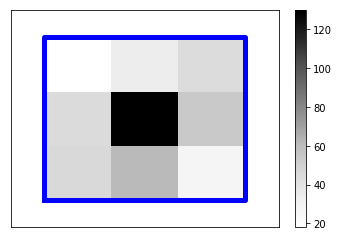

163.7 2.691003359480941e-31


<Figure size 432x288 with 0 Axes>

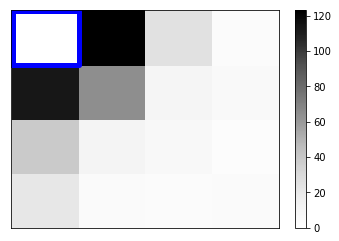

[7, 8]
Edades: [7, 8] N: 11


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

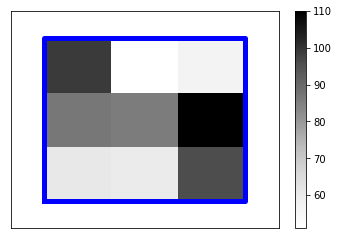

47.281471004243286 1.3550867595480578e-07


<Figure size 432x288 with 0 Axes>

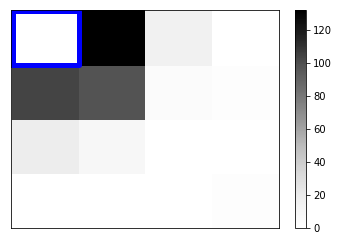

[9, 10]
Edades: [9, 10] N: 17


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

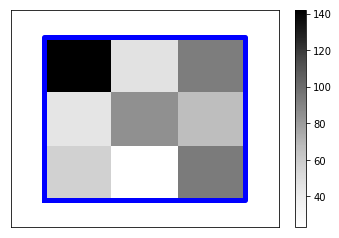

137.77335375191427 6.889655316682286e-26


<Figure size 432x288 with 0 Axes>

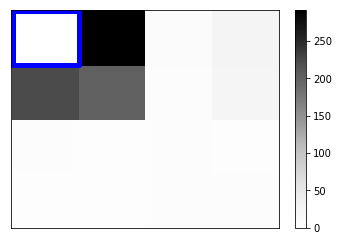

[11, 12]
Edades: [11, 12] N: 7


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

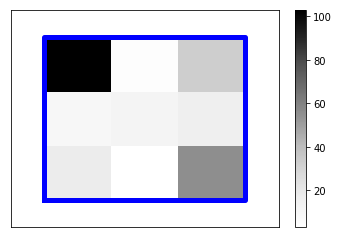

295.671875 3.4332020500307752e-59


<Figure size 432x288 with 0 Axes>

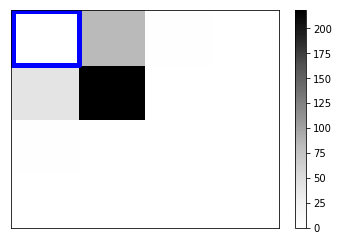

[13, 14]
Edades: [13, 14] N: 4


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

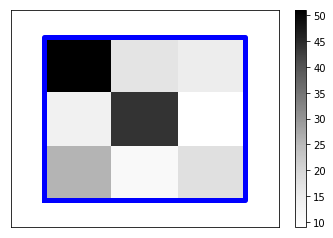

78.12682926829268 1.1638356755558565e-13


<Figure size 432x288 with 0 Axes>

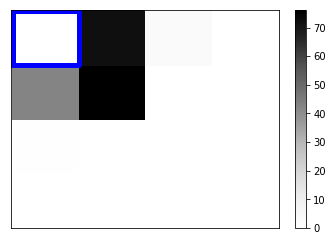

In [441]:

Rol=Teachers;
rol='teachers';

#Rol=Learners;
#rol='learners';

Edades=[];
for subject in Rol:
    Edades.append(subject['age']);
Edades=np.sort(Edades);
Edades=np.unique(Edades)


Edades=[[5,6],[7,8],[9,10],[11,12],[13,14]]
#Edades=[(5,6),(7,8),(9,10),(11,12)]

for e in Edades:
    print(e)
    N=0;    
    n_i=0;
    n_o=0;
    histo_inside=np.zeros([3,3]);
    histo_outside=np.zeros([4,4]);
    Id=[];
    for subject in Rol:                  
        #if (subject['understood'] and subject['age'] == e):
        if (subject['understood'] and subject['age'] in e):
            N=N+1;
            Id.append(subject['Id']);
            [inner,outer]=individual_histogram(subject,normalize=False);    
            if np.sum(inner)>0:
                n_i=n_i+1;
                histo_inside=histo_inside+inner;
                #histo_inside=histo_inside+inner/np.sum(inner);
            if np.sum(outer)>0:
                n_o=n_o+1;
                histo_outside=histo_outside+outer;
                #histo_outside=histo_outside+outer/np.sum(outer);
                
                
    histo_inside=np.flip(histo_inside,axis=0)
    histo_outside=np.flip(histo_outside,axis=0)
    
    plt.clf();   
    fig=plt.figure();
    Id.sort();
    #print(Id)        
    #histo_inside=histo_inside/n_i;    
    #histo_outside=histo_outside/n_o;    
    print('Edades:',e,'N:',N)
    fig=plt.figure();      
    plt.pcolor(histo_inside,cmap='Greys')     
    plt.colorbar();    
    plt.plot([0,3,3,0,0],[0,0,3,3,0],'b',linewidth=5)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False)    ;
    plt.show()
    hi=histo_inside.reshape(1,histo_inside.size)
    chi=chisquare(hi[0])
    print(chi.statistic,chi.pvalue)
    
    #fig.savefig('Age_'+str(e)+'_N_'+str(N)+'_circles_'+rol+'.png',bbox_inches='tight');
    
    
    plt.clf();
    fig=plt.figure();
    plt.title('');
    plt.pcolor(histo_outside,cmap='Greys');
    plt.colorbar();
    plt.plot([0,1,1,0,0],[3,3,4,4,3],'b',linewidth=5)
    plt.xlim([-0.03,4])
    plt.ylim([0.,4.01])    
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False);
    plt.show()
    
    #fig.savefig('Age_'+str(e)+'_N_'+str(N)+'_crosses_'+rol+'.png',bbox_inches='tight');
        
    
    


In [275]:
# DISTANCE TO THE CORNERS
def get_distance(sample,box):
    # corners
    
    c1=(box[0],box[2])
    c2=(box[1],box[2])
    c3=(box[0],box[3])
    c4=(box[1],box[3])
    d=min((sample[0]-c1[0])**2+(sample[1]-c1[1])**2,\
          (sample[0]-c2[0])**2+(sample[1]-c2[1])**2,\
          (sample[0]-c3[0])**2+(sample[1]-c3[1])**2,\
          (sample[0]-c4[0])**2+(sample[1]-c4[1])**2 )  
    return np.sqrt(d)


Data_dict={'Age':[],'Circles_to_corner':[],'Crosses_to_corner':[],'Rol':[],'Id':[],'corners_prop':[]}




for s in Teachers:
    
    distance_circles=[]
    distance_crosses=[]
    Data_dict['Age'].append(s['age'])
    Data_dict['Rol'].append('T')
    Data_dict['Id'].append(s['Id'])
    for t in s['trials']:
        for c in t['Circles']:
            distance_circles.append(get_distance(c,t['Box']))
        for c in t['Crosses']:
            distance_crosses.append(get_distance(c,t['Box']))
    Data_dict['Circles_to_corner'].append(np.mean(distance_circles))
    Data_dict['Crosses_to_corner'].append(np.mean(distance_crosses))
    
    [inner,outer]=individual_histogram(s);    
    if np.sum(inner)>0:
        corners=inner[0,0]+inner[0,2]+inner[2,0]+inner[2,2];
        non_corners=np.sum(inner)-corners;
        corners=corners/(np.sum(inner));
        Data_dict['corners_prop'].append(corners)
    else: 
        Data_dict['corners_prop'].append(np.nan)
    
for s in Learners:
    
    distance_circles=[]
    distance_crosses=[]
    Data_dict['Age'].append(s['age'])
    Data_dict['Rol'].append('L')
    Data_dict['Id'].append(s['Id'])
    for t in s['trials']:
        for c in t['Circles']:
            distance_circles.append(get_distance(c,t['Box']))
        for c in t['Crosses']:
            distance_crosses.append(get_distance(c,t['Box']))
    Data_dict['Circles_to_corner'].append(np.mean(distance_circles))
    Data_dict['Crosses_to_corner'].append(np.mean(distance_crosses))
    [inner,outer]=individual_histogram(s);    
    if np.sum(inner)>0:
        corners=inner[0,0]+inner[0,2]+inner[2,0]+inner[2,2];
        non_corners=np.sum(inner)-corners;
        corners=corners/(np.sum(inner));
        Data_dict['corners_prop'].append(corners)
    else: 
        Data_dict['corners_prop'].append(np.nan)


/home/ahaimovici/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# WATCH TRIALS:


    
for d in Learners:
    if d['age']in [11,12]:
        print('############# NEW SUBJECT ############')
        for trial in d['trials']:
            draw_trial(trial)        
    
    

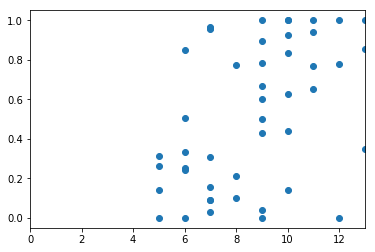

In [281]:
rol='T'

plt.plot(Data[Data['Rol']==rol]['Age'],Data[Data['Rol']==rol]['corners_prop'],'o')
plt.xlim([0,13])
plt.show()

In [286]:
Data[Data['Age']==12]['corners_prop']


6     1.000000
38    0.780000
53    0.000000
62    0.719298
65    0.692308
66    0.468085
73    0.440000
Name: corners_prop, dtype: float64

/home/ahaimovici/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


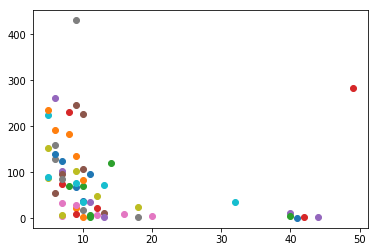

NameError: name 'xlim' is not defined

In [227]:
Edades=[[5,6],[7,8],[9,10],[11,12]]
Edades=[5,6]

Rol='T'
plt.clf()

for i in Data.index:
    #plt.plot(np.ones(len(Data.loc[i]['Crosses_to_corner']))*Data.loc[i]['Age'],Data.loc[i]['Crosses_to_corner'],'o')
    if Data.loc[i]['Rol']=='T':
        plt.plot(Data.loc[i]['Age'],np.mean(Data.loc[i]['Crosses_to_corner']),'o')
plt.show()
xlim([0,12])




'''
if Data.loc[i]['Age']in Edades and Data.loc[i]['Rol']=='T':
    plt.hist(Data.loc[i]['Circles_to_corner'])
plt.show()
'''

In [438]:
len(Learners)

57

In [188]:
Data.shape

(119, 5)

In [117]:
Edades=[];
for subject in Teachers:
    Edades.append(subject['age']);
Edades=np.sort(Edades);
print('Teachers')
print(Edades)

Edades=[];
for subject in Learners:
    Edades.append(subject['age']);
Edades=np.sort(Edades);
print('Learners')
print(Edades)

Teachers
[ 5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  9  9
  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 12 12 12 13 13
 13 14 16 18 18 20 32 40 40 41 42 44 49 57]
Learners
[ 5  5  6  6  6  6  6  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 12 12 12 12 13 13 13 14
 17 17 19 20 32 42 43 44 45]


In [190]:
len(Learners)

57

In [191]:
57+62

119

In [93]:
from scipy.stats import chisquare
from scipy.stats import chi2



In [105]:
np.flip(inner,axis=0)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [87]:
chi.pvalue

1.2825186294207001e-09

## Corners vs non corners

[5, 6]
Age: [5, 6]
[7, 8]
Age: [7, 8]
[9, 10]
Age: [9, 10]
[11, 12]
Age: [11, 12]
ie 1
ie 2
ie 3
ie 4


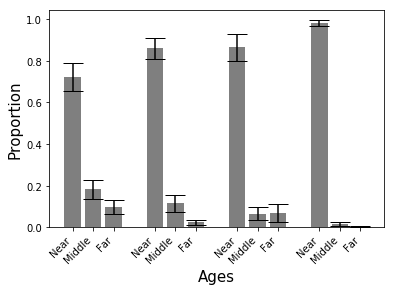

10
11
16
7


"\n# Build the plot\nfig, ax = plt.subplots();    \nax.bar([1,2], [np.mean(corners_prop),np.mean(non_corners_prop)], yerr=[np.std(corners_prop)/np.sqrt(len(corners_prop)),np.std(non_corners_prop)/np.sqrt(len(non_corners_prop))], align='center', alpha=0.5,facecolor='black' ,ecolor='black', capsize=10)\nax.set_ylabel('Proportion')\nax.set_xticks([1,2])\nax.set_xticklabels(['Corners','Non-corners'])\nax.set_title(rol)\nax.plot([0,2],[4/9,4/9],'--r')\nplt.show()\n\nfig, ax = plt.subplots();    \nax.bar([1,2,3], [np.mean(near_prop),np.mean(middle_prop),np.mean(far_prop)], yerr=[np.std(near_prop)/np.sqrt(len(near_prop)),np.std(middle_prop)/np.sqrt(len(middle_prop)),np.std(far_prop)/np.sqrt(len(far_prop))], align='center', alpha=0.5,facecolor='black' ,ecolor='black', capsize=10)\nax.set_ylabel('Proportion')\nax.set_xticks([1,2,3])\nax.set_xticklabels(['Near','Middle','Far'])\nax.set_title(rol)\nplt.show()            \n"

In [436]:

Rol=Teachers;
rol='teachers';

#Rol=Learners;
#rol='learners';

Edades=[];
for subject in Rol:
    Edades.append(subject['age']);
Edades=np.sort(Edades);


Edades=[[5,6],[7,8],[9,10],[11,12]]




#for e in np.unique(Edades):
ie=0

ages=[]

corners_prop_per_age=[]

near_per_age=[]
middle_per_age=[]
far_per_age=[]


fig_crosses, ax_crosses = plt.subplots();    


for e in Edades:
    ie+=1
    print(e)
    N=0;                    
    corners_prop=[];
    non_corners_prop=[];    
    near_prop=[];
    middle_prop=[];
    far_prop=[];
    for subject in Rol:                  
        if (subject['understood'] and subject['age'] in e):
        #if (subject['understood'] and subject['age'] == e):
            N=N+1;
            [inner,outer]=individual_histogram(subject);    
            if np.sum(inner)>0:
                n_i=n_i+1;                
                corners=inner[0,0]+inner[0,2]+inner[2,0]+inner[2,2];
                non_corners=np.sum(inner)-corners;
                corners=corners/(np.sum(inner));
                non_corners=non_corners/(np.sum(inner));
                corners_prop.append(corners);
                ages.append(subject['age'])
                non_corners_prop.append(non_corners);
            if np.sum(outer)>0:      
                near=(outer[0,1]+outer[1,0]+outer[1,1])/np.sum(outer); # near
                middle=(outer[0,2]+outer[1,2]+outer[2,2]+outer[2,0]+outer[2,1])/np.sum(outer); # middle
                far=1-near-middle;
                near_prop.append(near);
                middle_prop.append(middle);
                far_prop.append(far);

                
                
    corners_prop_per_age.append(corners_prop)
    near_per_age.append(near_prop)
    middle_per_age.append(middle_prop)
    far_per_age.append(far_prop)                
    
    print('Age:',e)
#    fig, ax = plt.subplots();    

    ax_crosses.bar(4*(ie-1)+np.array([1,2,3]), [np.mean(near_prop),np.mean(middle_prop),np.mean(far_prop)], yerr=[np.std(near_prop)/np.sqrt(len(near_prop)),np.std(middle_prop)/np.sqrt(len(middle_prop)),np.std(far_prop)/np.sqrt(len(far_prop))], align='center', alpha=0.5,facecolor='black' ,ecolor='black', capsize=10)        
    #ax.set_xticks([1,2,3])
    #ax.set_xticklabels(['Near','Middle','Far'])

    
    
   # Build the plot
    '''
    ax.bar(ie, np.mean(corners_prop), yerr=np.std(corners_prop)/np.sqrt(len(corners_prop)), align='center', alpha=0.5,facecolor='black' ,ecolor='black', capsize=10)        
    #ax.set_xticklabels(['Corners','Non-corners'])
    if rol=='teachers':
        ax.set_title('Teachers',fontsize=15)
    if rol=='learners':
        ax.set_title('Learners',fontsize=15)
    ax.plot([0,5],[4/9,4/9],'--r')


    
    print('Age:',e,'ttest:')
    print(stats.ttest_1samp(corners_prop,4/9))

    ax.set_ylabel('Proportion of corners',fontsize=15)    
    ax.set_xlabel('Age',fontsize=15)    
    ax.set_xticks([1,2,3,4])    
    ax.set_xticklabels(['5-6','7-8','9-10','11-12'],fontsize=10)
    '''
    
xticks=[]
x_lbls=[]
for ie in range(1,len(Edades)+1): 
    print('ie',ie)
    xticks.append(4*(ie-1)+1)
    xticks.append(4*(ie-1)+2)
    xticks.append(4*(ie-1)+3)
    x_lbls.append('Near')
    x_lbls.append('Middle')
    x_lbls.append('Far')
    
ax_crosses.set_xticks(xticks)
ax_crosses.set_xticklabels(x_lbls, rotation = 45, ha="right")
plt.xlabel('Ages',fontsize=15)
plt.ylabel('Proportion',fontsize=15)
plt.show()
fig_crosses.savefig('crosses_position_vs_age_'+rol+'.pdf')


ig=0
Group=[]
for item in corners_prop_per_age:
    ig+=1
    Group.append(np.ones(len(item))*ig)
    print(len(item))

flat_group = [item for sublist in Group for item in sublist]

flat_data=[item for sublist in corners_prop_per_age for item in sublist]

'''
print('Linear regression')
Regress_group=linregress(flat_group,flat_data)
print(linregress(flat_group,flat_data))

x_aux=np.array(range(1,len(Edades)+1))
y_fit=x_aux*Regress_group.slope+Regress_group.intercept
'''

'''
if rol=='teachers':
    ax.plot(x_aux,y_fit,'--b')
'''

#plt.xlabel('Age',fontsize=15)
#plt.ylabel('Proportion of corners',fontsize=15)
#print( pairwise_tukeyhsd(flat_data, flat_group))
#plt.ylim([0,0.9])

#plt.show() 
#fig.savefig('Corners_vs_age_barplot_'+rol+'.png')

#print(stats.f_oneway(corners_prop_per_age[0], corners_prop_per_age[1], corners_prop_per_age[2], corners_prop_per_age[3]))

'''
print('Linear regression using actual age')
Regress_Age=linregress(ages,flat_data)
print(Regress_Age)
'''

'''
fig=plt.figure()
plt.plot(ages,flat_data,'ok')
x_aux=np.array(range(min(ages),max(ages)+1))
y_fit=x_aux*Regress_Age.slope+Regress_Age.intercept
plt.plot(x_aux,y_fit,'--b')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Proportion of corners',fontsize=15)
plt.ylim([-0.05,1.05])
plt.show()
#fig.savefig('Corners_prop_vs_age_'+rol+'.png')
'''


'''
# Build the plot
fig, ax = plt.subplots();    
ax.bar([1,2], [np.mean(corners_prop),np.mean(non_corners_prop)], yerr=[np.std(corners_prop)/np.sqrt(len(corners_prop)),np.std(non_corners_prop)/np.sqrt(len(non_corners_prop))], align='center', alpha=0.5,facecolor='black' ,ecolor='black', capsize=10)
ax.set_ylabel('Proportion')
ax.set_xticks([1,2])
ax.set_xticklabels(['Corners','Non-corners'])
ax.set_title(rol)
ax.plot([0,2],[4/9,4/9],'--r')
plt.show()

fig, ax = plt.subplots();    
ax.bar([1,2,3], [np.mean(near_prop),np.mean(middle_prop),np.mean(far_prop)], yerr=[np.std(near_prop)/np.sqrt(len(near_prop)),np.std(middle_prop)/np.sqrt(len(middle_prop)),np.std(far_prop)/np.sqrt(len(far_prop))], align='center', alpha=0.5,facecolor='black' ,ecolor='black', capsize=10)
ax.set_ylabel('Proportion')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Near','Middle','Far'])
ax.set_title(rol)
plt.show()            
''' 
    








In [423]:
xticks

[-3, -2, -1, 1, 2, 3, 5, 6, 7, 9, 10, 11]

In [415]:
4*(3-1)+np.array([1,2,3])

array([ 9, 10, 11])

In [374]:
x_aux


array([ 5,  6,  7,  8,  9, 10, 11, 12])